<h2 align="center">Predicting the artist from text 
    <h2 align="center">using Web Scraping and a Naive Bayes classifier
</h2>
    
    
__1) The Goal:__ Build a text classification model to predict the artist from a piece of text. 
    
__2) Get the Data:__ Download HTML pages, Get a list of song urls, Extract lyrics from song urls
    
__3) Split the Data:__ As usual.  

__4) Exploratory Data Analysis (EDA):__ No need for EDA here.

__5)-9) Feature Engineering (FE), Train Model, Optimize Hyperparameters/Cross-Validation:__ Convert text to numbers by applying the Bag Of Words method; Build and train a Naive Bayes classifier; Balance out the dataset.

__10) Calculate Test Score__ 
    
__11) Deploy and Monitor:__   Write a command-line interface


------------------

<h2 align="center"><strong>Getting the data: Web Scraping</strong></h2>

In [160]:
import requests
from bs4 import BeautifulSoup
from bs4 import SoupStrainer

### Step 1. Get the raw HTML text from the target website

In [171]:
type(requests.get('https://www.metrolyrics.com/' + artist + '-alpage-1.html')) #.text is a string

requests.models.Response

In [2]:
artist = 'michael-jackson'

with open('mj_page1.html', 'w') as file:
    file.write(requests.get('https://www.metrolyrics.com/' + artist + '-alpage-1.html').text)

In [3]:
with open('mj_page1.html', 'r') as file:
    soup = BeautifulSoup(markup=file)
    
pages = []
for link in soup.find_all(class_ = 'pages')[0].find_all('a'):
    pages.append(link.get('href'))

print(pages)

['http://www.metrolyrics.com/michael-jackson-alpage-1.html', 'http://www.metrolyrics.com/michael-jackson-alpage-2.html', 'http://www.metrolyrics.com/michael-jackson-alpage-3.html', 'http://www.metrolyrics.com/michael-jackson-alpage-4.html', 'http://www.metrolyrics.com/michael-jackson-alpage-5.html', 'http://www.metrolyrics.com/michael-jackson-alpage-6.html']


In [17]:
mj_links = []
for i in range(len(pages)):
    with open('mj_page'+str(i+1)+'.html', 'r') as file:
        soup = BeautifulSoup(markup=file)
    
        for div in soup.find_all('div', attrs={'class':'module', 'id': 'popular'}):
            for td in div.find_all('td'):
                if td.a is not None:
                    mj_links.append(td.a.get('href'))

print(len(mj_links)) 
print(len(pages))

402
6


In [180]:
len(mj_links), len(mj_lyrics)

(402, 20556)

In [178]:
# Run this to use mj_lyrics !

with open('mj_lyrics.txt', 'r') as f:
    mj_lyrics = [line.rstrip() for line in f]

In [280]:
given = 'aaaabbbcca'
result = []

i = 0
count = 0

for l in given:
    if l == given[i]:
        count = count + 1   
    else:
        i = i + count
        new_count = 0
        count = new_count + 1
    result.append((l,count))

tuple_result = []
for i in range((len(result))):
    if (i+1) < len(result):
        if result[i][0] == result[i+1][0]:
            continue
        else:
            tuple_result.append(result[i])
            continue
    else:
        tuple_result.append(result[len(result)-1])

print(tuple_result)

[('a', 4), ('b', 3), ('c', 2), ('a', 1)]


In [181]:
bsjgefue = 
print(bsjgefue)

SyntaxError: invalid syntax (<ipython-input-181-ce655a6a3e55>, line 1)

In [194]:
soup___________ = [BeautifulSoup(markup=markup) for markup in pages]
print(soup___________)


[<html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-1.html</p></body></html>, <html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-2.html</p></body></html>, <html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-3.html</p></body></html>, <html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-4.html</p></body></html>, <html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-5.html</p></body></html>, <html><body><p>http://www.metrolyrics.com/michael-jackson-alpage-6.html</p></body></html>]


### Step 2. Convert the raw HTML string to a BeautifulSoup-object, so that we can parse the data.

In [14]:
mj_1page_soup = BeautifulSoup(mj_1page.text, 'html.parser')
mj_1page_soup.find_all(class_ = 'pages')

[<span class="pages">
 <a class="current" href="http://www.metrolyrics.com/michael-jackson-alpage-1.html" onmousedown="ev('Page','1');">
 1	</a>
 <a href="http://www.metrolyrics.com/michael-jackson-alpage-2.html" onmousedown="ev('Page','2');">
 2	</a>
 <a href="http://www.metrolyrics.com/michael-jackson-alpage-3.html" onmousedown="ev('Page','3');">
 3	</a>
 <a href="http://www.metrolyrics.com/michael-jackson-alpage-4.html" onmousedown="ev('Page','4');">
 4	</a>
 <a href="http://www.metrolyrics.com/michael-jackson-alpage-5.html" onmousedown="ev('Page','5');">
 5	</a>
 <a href="http://www.metrolyrics.com/michael-jackson-alpage-6.html" onmousedown="ev('Page','6');">
 6	</a>
 </span>]

### Step 3. Use the BeautifulSoup object to parse the HTML document tree down to the tag that contains the data you want.
- There are multiple ways to get to the solution!
- `.find()` always returns the first instance of your "query"
- `.find_all()` returns a list-like object (called a "ResultSet") that contains the matching results.
- `.text` returns the actual part of the tag that is outside of the **< angled brackets  >** (i.e. the text)

In [15]:
tag_list = []
for tag in mj_1page_soup.find_all(class_ = 'pages'):
    #print(tag.text)
    tag_list.append(tag.text)
tag_list

['\n\n1\t\n\n2\t\n\n3\t\n\n4\t\n\n5\t\n\n6\t\n']

In [16]:
pages = []
for link in mj_1page_soup.find_all(class_ = 'pages')[0].find_all('a'):
    
    pages.append(link.get('href'))
    
print(len(pages),pages)

6 ['http://www.metrolyrics.com/michael-jackson-alpage-1.html', 'http://www.metrolyrics.com/michael-jackson-alpage-2.html', 'http://www.metrolyrics.com/michael-jackson-alpage-3.html', 'http://www.metrolyrics.com/michael-jackson-alpage-4.html', 'http://www.metrolyrics.com/michael-jackson-alpage-5.html', 'http://www.metrolyrics.com/michael-jackson-alpage-6.html']


-------------------------------

### So you've spent a lot of time writing useful code...Now what?

In [17]:
artist = 'michael-jackson'
url = 'https://www.metrolyrics.com/' + artist + '-alpage-1.html'

response = requests.get(url)

soup = BeautifulSoup(markup=response.text)

In [18]:
mj_links = []
for div in soup.find_all('div', attrs={'class':'module', 'id': 'popular'}):
    #print('here')
    for td in div.find_all('td'):
        if td.a is not None:
            mj_links.append(td.a.get('href'))

In [19]:
mj_lyrics = []
for li in mj_links[:10]:
    response = requests.get(li)
    soup2 = BeautifulSoup(markup=response.text)
    #lyrics_section = soup2.find(attrs={'class': 'module', 'id':'popular'})
    lyrics_chunk = []
    for verse in soup2.find_all('p', class_='verse'):
        lyrics_chunk.append(verse.text)
        
    mj_lyrics.append((' '.join(lyrics_chunk), 'michael jackson'))

### Saving the list of all the Michael Jackson lyrics as a binary data stream.

In [25]:
import pickle

with open('mj_lyrics_binary.txt', 'wb') as filehandle:
    pickle.dump(mj_lyrics, filehandle)

### Reading the list of all Michael Jackson lyrics from the binary data file.

In [24]:
with open('mj_lyrics_binary.txt', 'rb') as filehandle:
    test_binary = pickle.load(filehandle)
    
type(test_binary), len(test_binary)

(list, 10)

In [22]:
type(mj_lyrics), len(mj_lyrics)

(list, 10)

### Saving and reading the list of all the Michael Jackson lyrics as JavaScript Objecct Notation (JSON).

In [26]:
import json

with open('mj_lyrics_json.txt', 'w') as filehandle:
    json.dump(mj_lyrics, filehandle)

In [30]:
with open('mj_lyrics_json.txt', 'r') as filehandle:
    test_json = json.load(filehandle)

type(test_json), len(test_json)

(list, 10)

----------------

---------------

In [31]:
artist = 'mariah-carey'
url = 'https://www.metrolyrics.com/' + artist + '-alpage-1.html'

response = requests.get(url)

soup = BeautifulSoup(markup=response.text)

In [32]:
mc_links = []
for div in soup.find_all('div', attrs={'class':'module', 'id': 'popular'}):
    #print('here')
    for td in div.find_all('td'):
        if td.a is not None:
            mc_links.append(td.a.get('href'))

In [33]:
mc_lyrics = []
for li in mc_links[:10]:
    response = requests.get(li)
    soup2 = BeautifulSoup(markup=response.text)
    #lyrics_section = soup2.find(attrs={'class': 'module', 'id':'popular'})
    lyrics_chunk = []
    for verse in soup2.find_all('p', class_='verse'):
        lyrics_chunk.append(verse.text)
        
    mc_lyrics.append((' '.join(lyrics_chunk), 'mariah carey'))

In [102]:
type(mc_lyrics), len(mc_lyrics)

(list, 10)

### Saving the list of all the Michael Jackson lyrics as JavaScript Objecct Notation (JSON).

In [34]:
with open('mc_lyrics_json.txt', 'w') as filehandle:
    json.dump(mc_lyrics, filehandle)

----------------

---------------

### Clean up text

In [129]:
import spacy

nlp = spacy.load('en_core_web_md')

with open('mj_lyrics_json.txt', 'r') as filehandle:
    mj_json = json.load(filehandle)
    
#with open('mc_lyrics_json.txt', 'r') as filehandle:
 #   mc_json = json.load(filehandle)

    
text_original = [i[0] for i in mj_json]

In [131]:
text = nlp(text_original[0]) # when we make it, it's already tokenized
for token in text:
    print(token)

Sadness
had
been
close
as
my
next
of
kin


Then
Happy
came
one
day
,
chased
my
blues
away


My
life
began
when
Happy
smiled


Sweet
,
like
candy
to
a
child


Stay
here
and
love
me
just
a
while
Let
Sadness
see
what
Happy
does


Let
Happy
be
where
Sadness
was
Happy
,
that
's
you
,
you
made
my
life
brand
new


Lost
as
a
little
lamb
was
I
,
till
you
came
in


My
life
began
when
happy
smiled


Sweet
,
like
candy
to
a
child


Stay
here
and
love
me
just
a
while
Let
Sadness
see
what
Happy
does


Let
Happy
be
where
Sadness
was


(
Till
now
)
Where
have
I
been
,
what
lifetime
was
I
in
?


Suspended
between
time
and
space


Lonely
until
,
Happy
came
smiling
up
at
me


Sadness
had
no
choice
but
to
flee


I
said
a
prayer
so
silently
Let
Sadness
see
what
Happy
does


Let
Happy
be
where
Sadness
was
till
now


Till
now
Happy
,
yeah
,
yeah
,
happy


La
,
la
,
la
,
la
,
la
,
la
,
la
,
la


Yeah
happy
,
ooh
,
happy


La
,
la
,
la
,
la
,
la
,
la
,
la
,
la


Happy
,
oh
yeah
happy


La
,
la
,
la
,
la
,
la
,

## Linguistic Features

In [97]:
# Tokenization, stop words

In [132]:
li = []
for token in text:
    if token.is_stop == True:
        li.append(token)
print('Tokens that are stop words: {}'.format(li))

Tokens that are stop words: [had, been, as, my, next, of, Then, one, my, My, when, to, a, here, and, me, just, a, while, see, what, does, be, where, was, that, 's, you, you, made, my, as, a, was, I, you, in, My, when, to, a, here, and, me, just, a, while, see, what, does, be, where, was, now, Where, have, I, been, what, was, I, in, between, and, until, up, at, me, had, no, but, to, I, a, so, see, what, does, be, where, was, now, now]


In [133]:
li = []
for token in text:
    if token.is_stop == True:
        if token.lemma_ not in li:
                li.append(token.lemma_)

            
print('Tokens that are stop words: {}'.format(li))

Tokens that are stop words: ['have', 'be', 'as', 'my', 'next', 'of', 'then', 'one', 'when', 'to', 'a', 'here', 'and', 'I', 'just', 'while', 'see', 'what', 'do', 'where', 'that', 'you', 'make', 'in', 'now', 'between', 'until', 'up', 'at', 'no', 'but', 'so']


In [156]:
text_original[2]

"word out shockin all alone\nWord out shockin' all alone\nCryin' wolf ain't like a man\nThrowin' rocks to hide your hands You ain't done enough for me\nYou ain't done enough for me\nYou are disgustin' me, yeah yeah\nYou're aiming just for me\nYou are disgustin' me\nJust want your cut from me\nBut too bad, too bad Look who just walked in the place\nDead and stuffy in the face\nLook who's standing if you please\nThough you tried to bring me to my knees Too bad too bad about it\nWhy don't you scream and shout it\nToo bad too bad about it\nWhy don't you just scream and shout it\nToo bad too bad about it\nWhy don't you scream and shout it\nToo bad too bad about it\nWhy don't you just scream and shout it Hell all up in Hollywood\nSayin' that you got it good\nCreepin' from a dusty hole\nTales of what somebody told What do you want from me?\nWhat do you want from me?\nTired of you haunting me, yeah yeah\nYou're aiming just for me\nYou are disgustin' me\nYou got blood lust for me\nbut too bad, 

In [157]:
def spacy_cleaner(document):
    tokenize_doc = nlp(document)
    new_doc = []
    for token in tokenize_doc:
        if not token.is_stop and token.is_alpha:
            new_doc.append(token.lemma_)
    return new_doc

In [168]:
jfjffkjfku = []
with open('mj_lyrics_json.txt', 'r') as filehandle:
    mj_json = json.load(filehandle)
    text_original = [i[0] for i in mj_json]
    jfjffkjfku = [spacy_cleaner(song) for song in text_original]
    
print(jfjffkjfku[1])

['word', 'shockin', 'Word', 'shockin', 'Cryin', 'wolf', 'ai', 'like', 'man', 'Throwin', 'rock', 'hide', 'hand', 'ai', 'ai', 'disgustin', 'yeah', 'yeah', 'aim', 'disgustin', 'want', 'cut', 'bad', 'bad', 'look', 'walk', 'place', 'dead', 'stuffy', 'face', 'look', 'stand', 'try', 'bring', 'knee', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'hell', 'Hollywood', 'Sayin', 'get', 'good', 'Creepin', 'dusty', 'hole', 'Tales', 'somebody', 'tell', 'want', 'want', 'tired', 'haunt', 'yeah', 'yeah', 'aim', 'disgustin', 'get', 'blood', 'lust', 'bad', 'bad', 'look', 'got', 'slap', 'face', 'dead', 'stuffy', 'pleace', 'right', 'wanna', 'standin', 'kickin', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'bad', 'bad', 'scream', 'shout', 'l

In [103]:
# POS-tagging

In [104]:
for token in text[:15]:
    print(token, token.pos_)

Super ADJ
trouper NOUN
beams NOUN
are AUX
gon VERB
na PART
blind VERB
me PRON

         SPACE
But CCONJ
I PRON
wo AUX
n't PART
feel VERB
blue ADJ


In [105]:
spacy.explain('CCONJ')

'coordinating conjunction'

In [106]:
# Named Entity Recognition (NER)

In [107]:
text2 = nlp("My name is Ada Lovelace, I am in New York until Christmas and work at Google since May 2020.")
text2

My name is Ada Lovelace, I am in New York until Christmas and work at Google since May 2020.

In [108]:
spacy.displacy.render(text2, style = 'ent')

In [109]:
# Dependencies

In [110]:
spacy.displacy.render(text2, style='dep')

# Word embeddings

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
things = pd.DataFrame({'size': [60, 65, 15, 90, 92, 45, 70, 50, 21],
                      'roundness': [76, 11, 94, 99, 96, 8, 18, 15, 56]}, 
                       index=['Apple', 'Banana', 'Blueberry', 
                              'Melon', 'Football', 'Pen', 'Shoe', 'Spoon', 'Dice'])
things

,size,roundness
Apple,60,76
Banana,65,11
Blueberry,15,94
Melon,90,99
Football,92,96
Pen,45,8
Shoe,70,18
Spoon,50,15
Dice,21,56


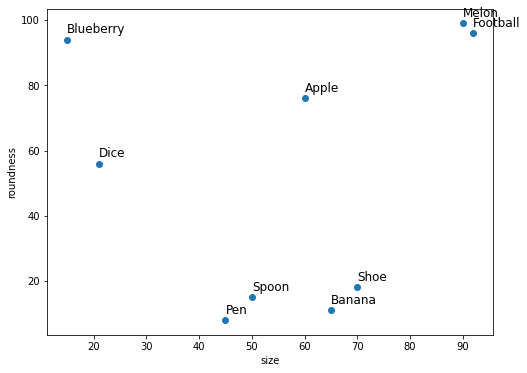

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(things['size'], things['roundness'])
plt.xlabel('size'), plt.ylabel('roundness')
for i, txt in enumerate(things.index):
    plt.annotate(txt, (things.iloc[i][0], things.iloc[i][1]+2), fontsize=12)

# Word vectors in Spacy
Spacy can compare two word(vector)s regarding how similar they are. For this, you need a model of at least medium size, e.g. `en_core_web_md`. 

In [114]:
pd.DataFrame(nlp('cat').vector)

,0
0,-0.150670
1,-0.024468
2,-0.233680
3,-0.233780
4,-0.183820
...,...
295,0.815060
296,0.038524
297,0.460040
298,0.171870


In [115]:
word1 = nlp('cat')
word2 = nlp('dog')
round(word1.similarity(word2), 2)

0.8

In [116]:
word1 = nlp('hound')
round(word1.similarity(word2), 2)

1.0

In [117]:
word1 = nlp('genius')
word2 = nlp('man')
round(word1.similarity(word2), 2)

0.46

In [118]:
word1 = nlp('genius')
word2 = nlp('woman')
round(word1.similarity(word2), 2)

0.27

In [126]:
def vec(s):
    return nlp.vocab[s].vector.reshape(1, -1)

new_queen = vec('king') - vec('man') + vec('woman')

In [131]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(new_queen, vec('queen'))

array([[0.7880845]], dtype=float32)

----------------

## "Bag of Words"  
### Step 1. Construct a Text Corpus
- This is basically what you end up with after all your scraping and cleaning.

In [35]:
#for i in mj_lyrics_string:
 #   print(i[0])

with open('mj_lyrics_json.txt', 'r') as filehandle:
    mj_json = json.load(filehandle)
    
with open('mc_lyrics_json.txt', 'r') as filehandle:
    mc_json = json.load(filehandle)

mj_corpus = [i[0] for i in mj_json]
mc_corpus = [i[0] for i in mc_json]

CORPUS = mj_corpus + mc_corpus

In [36]:
LABELS = ['michael jackson'] * len(mj_lyrics) + ['mariah carey'] * len(mc_lyrics)

### Step 2. Vectorize the text input using the "Bag of Words" technique.

In [89]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
vec = cv.fit_transform(CORPUS[i] for i in range(len(CORPUS)))
pd.DataFrame(vec.todense(), columns = cv.get_feature_names(), index=LABELS).head()

,100,200,2000,3002,3d,aaahh,add,addicted,adventually,ah,...,writing,wrong,ya,yall,yea,yeaa,yeah,yeahh,yep,yo
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
michael jackson,0,8,39,1,8,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [39]:
#cv.get_stop_words()

### Step 3. Apply Tf-Idf Transformation (Normalization)

* TF - Term Frequency (% count of a word $w$ in doc $d$)
* IDF - Inverse Document Frequency

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
tf = TfidfTransformer()
vec2 = tf.fit_transform(vec)
pd.DataFrame(vec2.todense(), columns = cv.get_feature_names(), index = LABELS).head()

,100,200,2000,3002,3d,aaahh,add,addicted,adventually,ah,...,writing,wrong,ya,yall,yea,yeaa,yeah,yeahh,yep,yo
michael jackson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.061357,0.0,0.0,0.0
michael jackson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.043760,0.0,0.0,0.0
michael jackson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.043760,0.0,0.0,0.0
michael jackson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.036264,0.0,0.0,0.000000,0.000000,0.076795,0.0,0.0,0.0
michael jackson,0.0,0.127015,0.619197,0.015877,0.127015,0.015877,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.015877,0.015877,0.000000,0.0,0.0,0.0


### Step 4. Put everything together in a pipeline

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(CORPUS).todense()

In [43]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier()
m.fit(X, LABELS)

RandomForestClassifier()

In [44]:
m.score(X, LABELS)

1.0

In [45]:
#m.predict(['yellow submarine'])

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), RandomForestClassifier(max_depth=10))
pipeline.fit(CORPUS, LABELS)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [46]:
pipeline.predict_proba(['3002']) #mariah carey is the second one

array([[0.83, 0.17]])

In [53]:
pipeline.predict_proba(['addicted'])

array([[0.83, 0.17]])

In [48]:
pipeline.predict_proba(['bad'])

array([[0.82, 0.18]])

In [49]:
pipeline.predict_proba(['Alexandra']) # same default prediction whether it's chocolate or Alexandra

array([[0.83, 0.17]])

In [36]:
# up sampeling, down sampeling

--------------------------

# The Naive Bayes Classifier
#### A simple, probabilistic classification model built on top of Bayes' Theorem.

---

#### Naive Bayes in Scikit-Learn

In [75]:
from sklearn.naive_bayes import ComplementNB

In [110]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
vec = cv.fit_transform(CORPUS[i] for i in range(len(CORPUS)))
pd.DataFrame(vec.todense(), columns = cv.get_feature_names(), index=LABELS).head()

,100,200,2000,3002,3d,aaahh,add,addicted,adventually,ah,...,writing,wrong,ya,yall,yea,yeaa,yeah,yeahh,yep,yo
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
michael jackson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
michael jackson,0,8,39,1,8,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np

In [119]:
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), ComplementNB(alpha=0.5))

In [120]:
pipeline.fit(CORPUS, LABELS)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('complementnb', ComplementNB(alpha=0.5))])

In [121]:
pipeline.predict_proba(['100']) # first is mariah carey

array([[0.5863183, 0.4136817]])

In [122]:
pipeline.predict_proba(['2000'])

array([[0.30658299, 0.69341701]])

In [123]:
pipeline.predict_proba(['tensor tarragons rule']) # ??? 

array([[0.5, 0.5]])

---

In [124]:
fe = pipeline.named_steps['tfidfvectorizer']
nb_model = pipeline.named_steps['complementnb']

In [125]:
df = pd.DataFrame(np.exp(nb_model.feature_log_prob_), columns=fe.get_feature_names(), index=['Michael Jackson', 'Mariah Carey']).T

In [126]:
df.head()

,Michael Jackson,Mariah Carey
100,791.979424,558.787588
200,631.547587,800.246257
2000,353.815799,800.246257
3002,767.605113,800.246257
3d,631.547587,800.246257


In [127]:
df['diff'] = df['Michael Jackson'] - df['Mariah Carey']

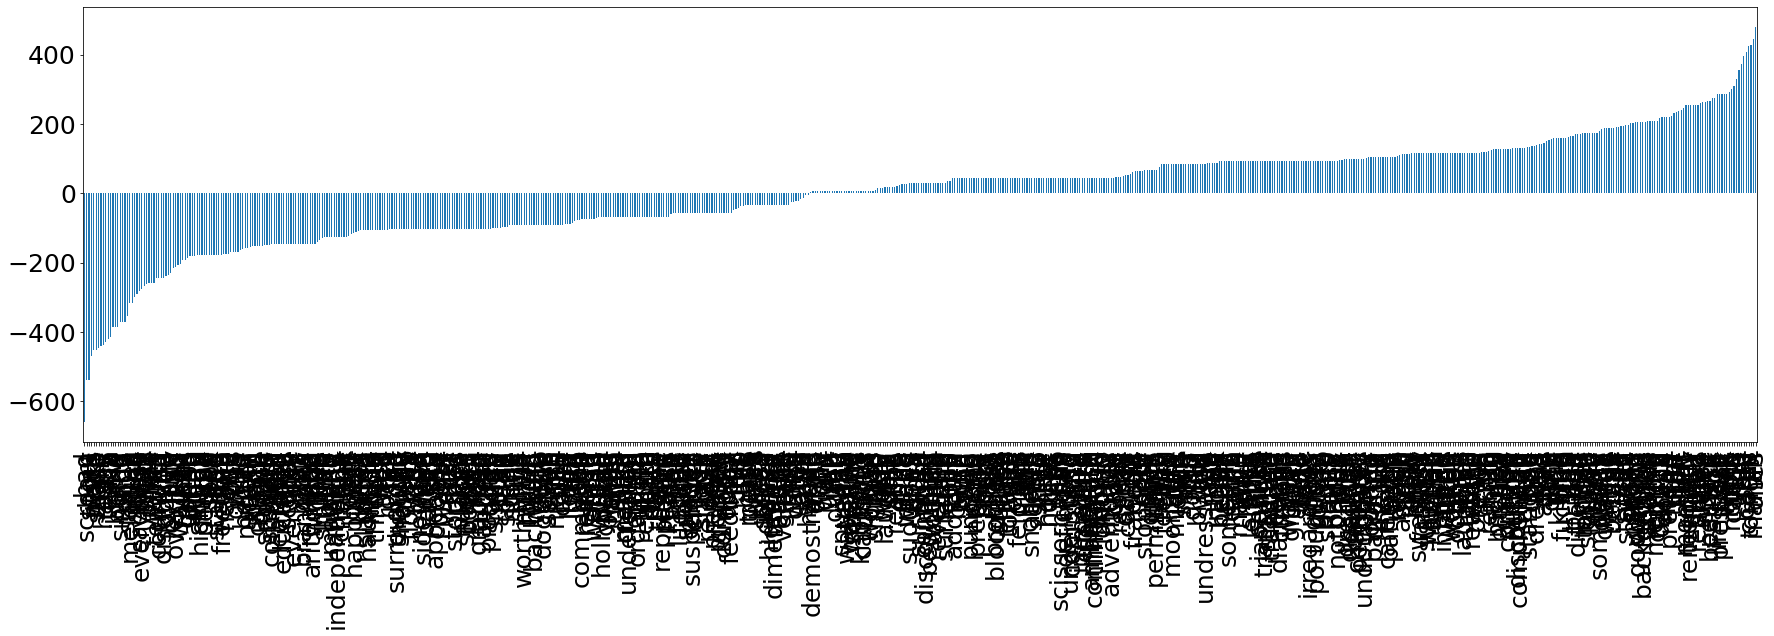

In [128]:
df['diff'].sort_values().plot.bar(figsize=(30, 8), fontsize=25);

json --> text corpus  
clean evenly --> list of strings  
train, test split text/lables  

single model pipeline:  
1) fct transformer (maybe more cleaning, lemm)  
2) tfid vectorizer  
3) predictive model  

apply pipeline to the train (fit, transf), test(transf)